In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
studentsProfiles_df=pd.read_csv('studentData.csv')

In [97]:
studentsProfiles_df.head()

,id,gender,parentsStatus,Hobby,swimming,drawing,sailing,computers,fencing,horseRiding,...,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT,V,A
0,1,male,singleParent,swimming,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0.30,0.17,0.13
1,2,female,married,\ndrawing,0,1,0,0,0,0,...,1,1,0,1,0,0,0,0.31,0.29,0.16
2,3,male,seperated,sailing,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0.22,0.17,0.30
3,4,male,seperated,computers,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0.16,0.29,0.15
4,5,female,married,computers,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0.27,0.12,0.30


In [98]:
studentsProfiles_df['gender'] = studentsProfiles_df['gender'].map({'male': 1, 'female': 0})
studentsProfiles_df.head()

,id,gender,parentsStatus,Hobby,swimming,drawing,sailing,computers,fencing,horseRiding,...,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT,V,A
0,1,1,singleParent,swimming,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0.30,0.17,0.13
1,2,0,married,\ndrawing,0,1,0,0,0,0,...,1,1,0,1,0,0,0,0.31,0.29,0.16
2,3,1,seperated,sailing,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0.22,0.17,0.30
3,4,1,seperated,computers,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0.16,0.29,0.15
4,5,0,married,computers,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0.27,0.12,0.30


In [99]:
studentsProfiles_df['parentsStatus'] = studentsProfiles_df['parentsStatus'].replace({'motherless':'singleParent','fatherless':'singleParent'})

In [100]:
studentsProfiles_df.head()

,id,gender,parentsStatus,Hobby,swimming,drawing,sailing,computers,fencing,horseRiding,...,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT,V,A
0,1,1,singleParent,swimming,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0.30,0.17,0.13
1,2,0,married,\ndrawing,0,1,0,0,0,0,...,1,1,0,1,0,0,0,0.31,0.29,0.16
2,3,1,seperated,sailing,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0.22,0.17,0.30
3,4,1,seperated,computers,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0.16,0.29,0.15
4,5,0,married,computers,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0.27,0.12,0.30


In [101]:
studentsProfiles_df['parentsStatus'] = studentsProfiles_df['parentsStatus'].map({'singleParent': 1, 'married': 0,'seperated':2,'adopted':3})
studentsProfiles_df.drop(['Hobby','idol','likesStudying','helpsWith','activityTaken','activityWithFamily'], axis = 1,inplace=True)

In [102]:
studentsProfiles_df.head()

,id,gender,parentsStatus,swimming,drawing,sailing,computers,fencing,horseRiding,tennis,...,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT,V,A
0,1,1,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0.30,0.17,0.13
1,2,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,0.31,0.29,0.16
2,3,1,2,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0.22,0.17,0.30
3,4,1,2,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0.16,0.29,0.15
4,5,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0.27,0.12,0.30


In [103]:
studentsProfiles_MT_df = studentsProfiles_df.drop(['A','V'],axis =1)

In [104]:
studentsProfiles_MT_df.drop(studentsProfiles_MT_df.tail(10).index,inplace=True)

In [105]:
X = studentsProfiles_MT_df.drop('MT',axis =1)
Y = studentsProfiles_MT_df['MT']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [106]:
studentsProfiles_MT_df.describe()

,id,gender,parentsStatus,swimming,drawing,sailing,computers,fencing,horseRiding,tennis,...,helpsAtHome,isActiveWithFamily,volunteers,likesGaming,hasAccessibilityIssue,hasADHD,hasADD,needsReading,needsExtraTime,MT
count,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,0.525000,0.87500,0.025000,0.075000,0.025000,0.075000,0.025000,0.050000,0.100000,...,0.775000,0.775000,0.650000,0.800000,0.075000,0.225000,0.050000,0.125000,0.050000,0.222500
std,11.690452,0.505736,0.96576,0.158114,0.266747,0.158114,0.266747,0.158114,0.220721,0.303822,...,0.422902,0.422902,0.483046,0.405096,0.266747,0.422902,0.220721,0.334932,0.220721,0.072031
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000
25%,10.750000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000
50%,20.500000,1.000000,0.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000
75%,30.250000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.292500
max,40.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.320000


In [107]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train,Y_train)

In [108]:
predictions = clf.predict(X_test)
predictions

array([0.31, 0.3 , 0.3 , 0.12, 0.13, 0.12, 0.09, 0.16])

In [109]:
rmse = np.sqrt(mean_squared_error(Y_test,predictions))
r2 = r2_score(Y_test,predictions)

n = predictions.shape[0]
k = X_train.shape[1]
adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)
print(rmse, r2, adj_r_sq)

0.12737739202856999 -3.2855963681386715 1.8107885020802894


In [111]:
print(k)

44


[Text(574.7916666666666, 1041.9, 'isAthletic <= 0.5\nmse = 0.006\nsamples = 32\nvalue = 0.215'),
 Text(258.3333333333333, 951.3000000000001, 'helpsAtHome <= 0.5\nmse = 0.001\nsamples = 7\nvalue = 0.156'),
 Text(155.0, 860.7, 'hasAccessibilityIssue <= 0.5\nmse = 0.001\nsamples = 3\nvalue = 0.123'),
 Text(103.33333333333333, 770.1, 'parentsStatus <= 1.0\nmse = 0.0\nsamples = 2\nvalue = 0.105'),
 Text(51.666666666666664, 679.5, 'mse = 0.0\nsamples = 1\nvalue = 0.12'),
 Text(155.0, 679.5, 'mse = 0.0\nsamples = 1\nvalue = 0.09'),
 Text(206.66666666666666, 770.1, 'mse = 0.0\nsamples = 1\nvalue = 0.16'),
 Text(361.66666666666663, 860.7, 'id <= 17.5\nmse = 0.0\nsamples = 4\nvalue = 0.18'),
 Text(310.0, 770.1, 'mse = 0.0\nsamples = 1\nvalue = 0.15'),
 Text(413.3333333333333, 770.1, 'likesGaming <= 0.5\nmse = 0.0\nsamples = 3\nvalue = 0.19'),
 Text(361.66666666666663, 679.5, 'mse = 0.0\nsamples = 1\nvalue = 0.2'),
 Text(465.0, 679.5, 'hasADHD <= 0.5\nmse = 0.0\nsamples = 2\nvalue = 0.185'),
 Tex

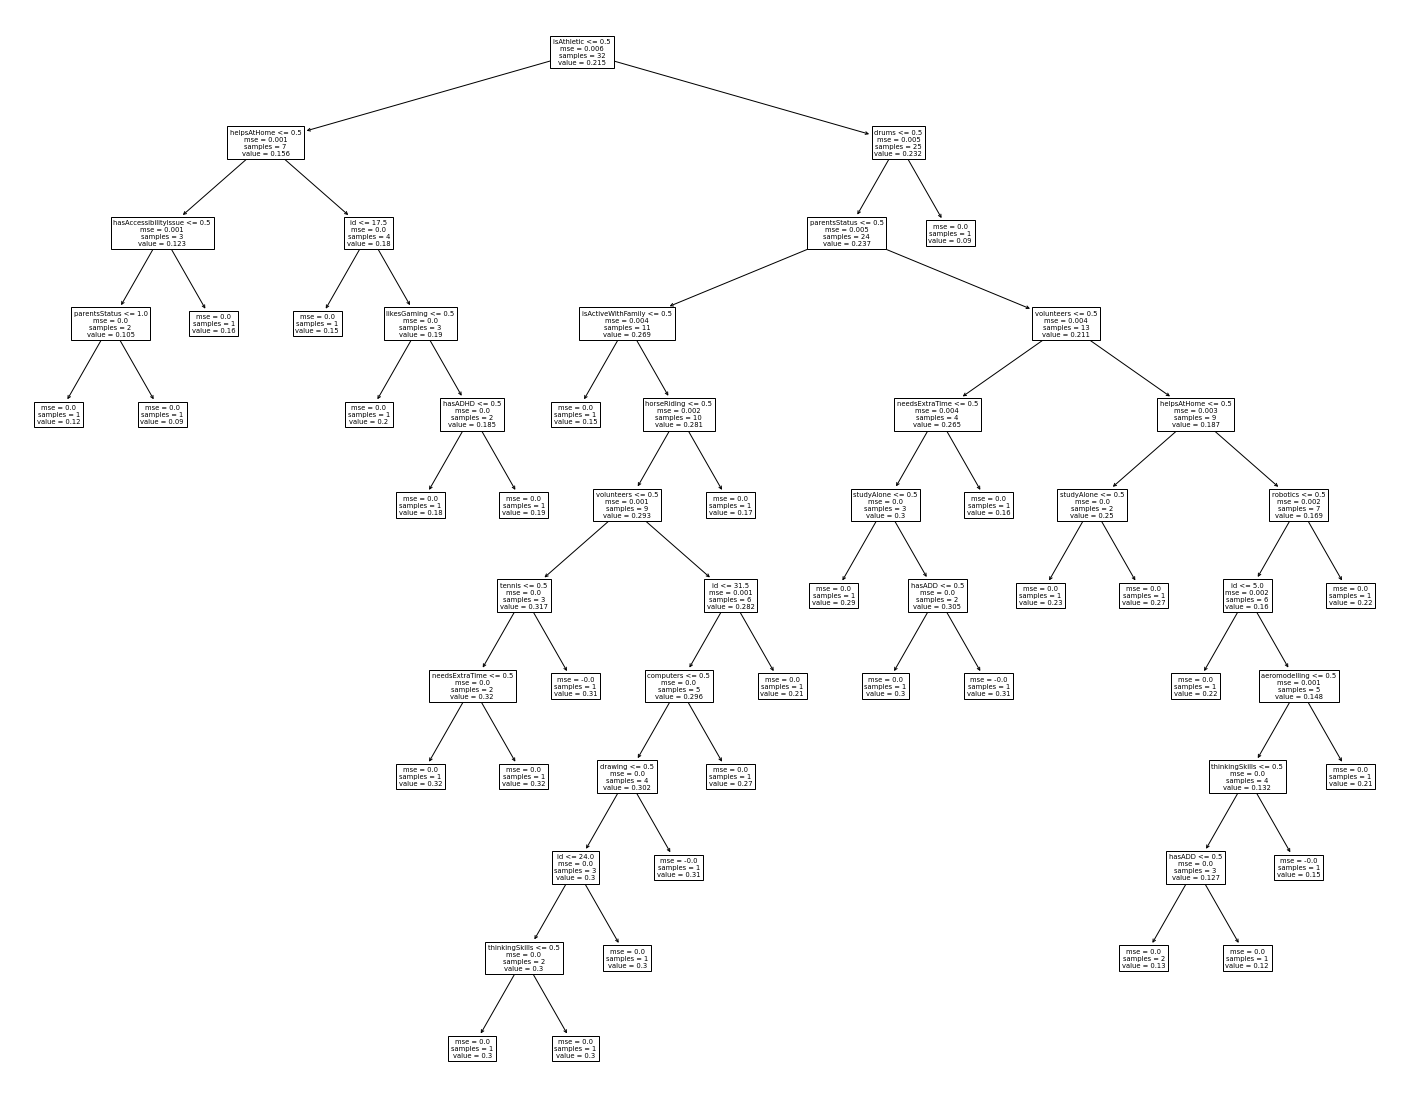

In [86]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,
              feature_names=studentsProfiles_MT_df.columns.values.tolist())